ADANA ŞİKAYET YÖNETİM SİSTEMİ:VERİ BİLİMİ YAKLAŞIMI PROJESİ

Bu proje, Adana'daki şikayet verilerini kullanarak veri ön işleme, keşifçi analiz ve makine öğrenimi modelleriyle şikayet süreçlerini analiz etmeyi ve tahminlemeyi amaçlamaktadır. Elde edilen içgörüler ve modeller, belediyenin hizmet kalitesini ve vatandaş memnuniyetini artırmasına katkı sağlamayı hedeflemektedir.

Gerekli Kütüphane ve Veri Setini Yükleme

In [ ]:
import pandas as pd

data = [
    {
        "ID": 1,
        "Tarih": "2025-06-01",
        "İlçe": "Çukurova",
        "Kategori": "Yol Sorunu",
        "Detay": "Yol üzerinde büyük çukur oluşmuş.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 2,
        "Tarih": "2025-06-02",
        "İlçe": "Seyhan",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöpler düzenli toplanmıyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 3,
        "Tarih": "2025-06-03",
        "İlçe": "Yüreğir",
        "Kategori": "Çöp Toplama",
        "Detay": "Gürültü       Gece geç saatlerde yüksek sesli müzik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 4,
        "Tarih": "2025-06-04",
        "İlçe": "Feke",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "2 gündür elektrik yok.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 5,
        "Tarih": "2025-06-05",
        "İlçe": "Tufanbeyli",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta oturma alanları kırık.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 5
    },
    {
        "ID": 6,
        "Tarih": "2025-06-06",
        "İlçe": "Pozantı",
        "Kategori": "Yol Sorunu",
        "Detay": "Asfalt çatlamış, tehlike arz ediyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 7,
        "Tarih": "2025-06-07",
        "İlçe": "Karaisalı",
        "Kategori": "Gürültü",
        "Detay": "İnşaat sabah çok erken başlıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 8,
        "Tarih": "2025-06-08",
        "İlçe": "Sarıçam",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöp konteynerleri dolu ve taşmış.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 9,
        "Tarih": "2025-06-09",
        "İlçe": "Ceyhan",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "Sık sık elektrik kesiliyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 10,
        "Tarih": "2025-06-10",
        "İlçe": "Yumurtalık",
        "Kategori": "Su Kesintisi",
        "Detay": "3 saattir su kesik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 11,
        "Tarih": "2025-06-11",
        "İlçe": "Karataş",
        "Kategori": "Su Kesintisi",
        "Detay": "Sular sık kesiliyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 12,
        "Tarih": "2025-06-12",
        "İlçe": "Aladağ",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta temizlik yapılmıyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 13,
        "Tarih": "2025-06-13",
        "İlçe": "İmamoğlu",
        "Kategori": "Gürültü",
        "Detay": "Kafeler yüksek sesle müzik çalıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 14,
        "Tarih": "2025-06-14",
        "İlçe": "Kozan",
        "Kategori": "Yol Sorunu",
        "Detay": "Trafik tabelaları eksik.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 15,
        "Tarih": "2025-06-15",
        "İlçe": "Saimbeyli",
        "Kategori": "Çöp Toplama",
        "Detay": "Sokaklarda koku var.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
]

df = pd.DataFrame(data)
display(df)

,ID,Tarih,İlçe,Kategori,Detay,Kanal,Çözüm_Durumu,Çözüm_süresi_gün
0,1,2025-06-01,Çukurova,Yol Sorunu,Yol üzerinde büyük çukur oluşmuş.,e-Devlet,Çözüldü,4
1,2,2025-06-02,Seyhan,Çöp Toplama,Çöpler düzenli toplanmıyor.,Çağrı Merkezi,Beklemede,0
2,3,2025-06-03,Yüreğir,Çöp Toplama,Gürültü Gece geç saatlerde yüksek sesli ...,Mobil Uygulama,Çözüldü,3
3,4,2025-06-04,Feke,Elektrik Kesintisi,2 gündür elektrik yok.,e-Devlet,Çözüldü,2
4,5,2025-06-05,Tufanbeyli,Park ve Bahçeler,Parkta oturma alanları kırık.,Çağrı Merkezi,Çözüldü,5
5,6,2025-06-06,Pozantı,Yol Sorunu,"Asfalt çatlamış, tehlike arz ediyor.",e-Devlet,Beklemede,0
6,7,2025-06-07,Karaisalı,Gürültü,İnşaat sabah çok erken başlıyor.,Mobil Uygulama,Çözüldü,1
7,8,2025-06-08,Sarıçam,Çöp Toplama,Çöp konteynerleri dolu ve taşmış.,Çağrı Merkezi,Çözüldü,2
8,9,2025-06-09,Ceyhan,Elektrik Kesintisi,Sık sık elektrik kesiliyor.,e-Devlet,Beklemede,0
9,10,2025-06-10,Yumurtalık,Su Kesintisi,3 saattir su kesik.,Mobil Uygulama,Çözüldü,1


JSON Formatına Dönüştürme

In [ ]:
import json

data = [
    {
        "ID": 1,
        "Tarih": "2025-06-01",
        "İlçe": "Çukurova",
        "Kategori": "Yol Sorunu",
        "Detay": "Yol üzerinde büyük çukur oluşmuş.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 2,
        "Tarih": "2025-06-02",
        "İlçe": "Seyhan",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöpler düzenli toplanmıyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 3,
        "Tarih": "2025-06-03",
        "İlçe": "Yüreğir",
        "Kategori": "Gürültü",
        "Detay": "Gece geç saatlerde yüksek sesli müzik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 4,
        "Tarih": "2025-06-04",
        "İlçe": "Feke",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "2 gündür elektrik yok.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 5,
        "Tarih": "2025-06-05",
        "İlçe": "Tufanbeyli",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta oturma alanları kırık.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 5
    },
    {
        "ID": 6,
        "Tarih": "2025-06-06",
        "İlçe": "Pozantı",
        "Kategori": "Yol Sorunu",
        "Detay": "Asfalt çatlamış, tehlike arz ediyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 7,
        "Tarih": "2025-06-07",
        "İlçe": "Karaisalı",
        "Kategori": "Gürültü",
        "Detay": "İnşaat sabah çok erken başlıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 8,
        "Tarih": "2025-06-08",
        "İlçe": "Sarıçam",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöp konteynerleri dolu ve taşmış.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 9,
        "Tarih": "2025-06-09",
        "İlçe": "Ceyhan",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "Sık sık elektrik kesiliyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 10,
        "Tarih": "2025-06-10",
        "İlçe": "Yumurtalık",
        "Kategori": "Su Kesintisi",
        "Detay": "3 saattir su kesik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 11,
        "Tarih": "2025-06-11",
        "İlçe": "Karataş",
        "Kategori": "Su Kesintisi",
        "Detay": "Sular sık kesiliyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 12,
        "Tarih": "2025-06-12",
        "İlçe": "Aladağ",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta temizlik yapılmıyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 13,
        "Tarih": "2025-06-13",
        "İlçe": "İmamoğlu",
        "Kategori": "Gürültü",
        "Detay": "Kafeler yüksek sesle müzik çalıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 14,
        "Tarih": "2025-06-14",
        "İlçe": "Kozan",
        "Kategori": "Yol Sorunu",
        "Detay": "Trafik tabelaları eksik.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 15,
        "Tarih": "2025-06-15",
        "İlçe": "Saimbeyli",
        "Kategori": "Çöp Toplama",
        "Detay": "Sokaklarda koku var.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    }
]

# JSON formatına dönüştür
json_output = json.dumps(data, indent=4, ensure_ascii=False)

# JSON çıktısını yazdır
print(json_output)

[
    {
        "ID": 1,
        "Tarih": "2025-06-01",
        "İlçe": "Çukurova",
        "Kategori": "Yol Sorunu",
        "Detay": "Yol üzerinde büyük çukur oluşmuş.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 2,
        "Tarih": "2025-06-02",
        "İlçe": "Seyhan",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöpler düzenli toplanmıyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 3,
        "Tarih": "2025-06-03",
        "İlçe": "Yüreğir",
        "Kategori": "Gürültü",
        "Detay": "Gece geç saatlerde yüksek sesli müzik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 4,
        "Tarih": "2025-06-04",
        "İlçe": "Feke",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "2 gündür elektrik yok.",
        "Kanal"

Veri Ön İşleme

In [ ]:
# 1. Boş verileri kontrol etme
print("Boş değer kontrolü (her sütunda eksik değer sayısı):")
print(df.isnull().sum())

# Mevcut veri setimizde boş değer yok gibi görünüyor.
# Eğer olsaydı, aşağıdaki gibi işlemler yapabilirdik:

# Örnek: Eğer 'Açıklama' sütununda boş değerler olsaydı ve bunları kaldırmak isteseydik:
# df.dropna(subset=['Açıklama'], inplace=True)

# Örnek: Eğer 'Öncelik' gibi sayısal bir sütunda boş değerler olsaydı ve ortalama ile doldurmak isteseydik:
# df['Öncelik'].fillna(df['Öncelik'].mean(), inplace=True)

# Örnek: Boş kalan tüm string sütunlarını 'Bilinmiyor' ile doldurmak:
# for col in df.select_dtypes(include='object').columns:
#     df[col].fillna('Bilinmiyor', inplace=True)

print("\nBoş veri temizleme sonrası DataFrame bilgileri:")
df.info()

Boş değer kontrolü (her sütunda eksik değer sayısı):
ID                  0
Tarih               0
İlçe                0
Kategori            0
Detay               0
Kanal               0
Çözüm_Durumu        0
Çözüm_süresi_gün    0
dtype: int64

Boş veri temizleme sonrası DataFrame bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                15 non-null     int64 
 1   Tarih             15 non-null     object
 2   İlçe              15 non-null     object
 3   Kategori          15 non-null     object
 4   Detay             15 non-null     object
 5   Kanal             15 non-null     object
 6   Çözüm_Durumu      15 non-null     object
 7   Çözüm_süresi_gün  15 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 1.1+ KB


In [ ]:
# Eksik değerleri kontrol et
print("Eksik değer kontrolü:\n", df.isnull().sum())

# Eğer eksik değerler olsaydı, onları doldurmak veya silmek için örnekler:
# Sayısal bir sütundaki eksik değerleri ortalama ile doldurma:
# df['Çözüm_süresi_gün'].fillna(df['Çözüm_süresi_gün'].mean(), inplace=True)

# Kategorik bir sütundaki eksik değerleri en sık görülen değer ile doldurma:
# df['Kanal'].fillna(df['Kanal'].mode()[0], inplace=True)

# Eksik değer içeren satırları silme (dikkatli kullanılmalı):
# df.dropna(inplace=True)

Eksik değer kontrolü:
 ID                  0
Tarih               0
İlçe                0
Kategori            0
Detay               0
Kanal               0
Çözüm_Durumu        0
Çözüm_süresi_gün    0
dtype: int64


Tarih Verilerini Analize Hazırlama

In [ ]:
#Tarih formatlarını düzenleme

# 'Tarih' sütununu datetime tipine dönüştürme
# errors='coerce' parametresi, dönüştürülemeyen değerleri NaT (Not a Time) yapar
df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')

# Dönüştürme sonrası boş tarih olup olmadığını kontrol etme (eğer dönüştürülemeyen bir tarih varsa)
print("\nTarih dönüştürme sonrası boş tarih kontrolü:")
print(df['Tarih'].isnull().sum())

print("\nTarih formatı düzenleme sonrası DataFrame bilgileri:")
df.info()

print("\nTarih sütununun ilk 5 değeri (veri tipi kontrolü için):")
print(df['Tarih'].head())


Tarih dönüştürme sonrası boş tarih kontrolü:
0

Tarih formatı düzenleme sonrası DataFrame bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tarih             15 non-null     datetime64[ns]
 1   İlçe              15 non-null     object        
 2   Kategori          15 non-null     object        
 3   Kanal             15 non-null     object        
 4   Çözüm_Durumu      15 non-null     object        
 5   Çözüm_süresi_gün  15 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 852.0+ bytes

Tarih sütununun ilk 5 değeri (veri tipi kontrolü için):
0   2025-06-01
1   2025-06-02
2   2025-06-03
3   2025-06-04
4   2025-06-05
Name: Tarih, dtype: datetime64[ns]


Sütun Seçimi ve İyileştirme

In [ ]:
#Gereksiz sütunları çıkarma

# Kaldırılacak sütunların listesi
columns_to_drop = ['Sıra No']

# Eğer sütun varsa kaldır
for col in columns_to_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)
        print(f"'{col}' sütunu başarıyla kaldırıldı.")
    else:
        print(f"'{col}' sütunu bulunamadı.")

print("\nGereksiz sütunlar çıkarıldıktan sonra DataFrame'in ilk 5 satırı:")
print(df.head())

print("\nGereksiz sütunlar çıkarıldıktan sonra DataFrame bilgileri:")
df.info()

'Sıra No' sütunu bulunamadı.

Gereksiz sütunlar çıkarıldıktan sonra DataFrame'in ilk 5 satırı:
       Tarih        İlçe            Kategori           Kanal Çözüm_Durumu  \
0 2025-06-01    Çukurova          Yol Sorunu        e-Devlet      Çözüldü   
1 2025-06-02      Seyhan         Çöp Toplama   Çağrı Merkezi    Beklemede   
2 2025-06-03     Yüreğir         Çöp Toplama  Mobil Uygulama      Çözüldü   
3 2025-06-04        Feke  Elektrik Kesintisi        e-Devlet      Çözüldü   
4 2025-06-05  Tufanbeyli    Park ve Bahçeler   Çağrı Merkezi      Çözüldü   

   Çözüm_süresi_gün  
0                 4  
1                 0  
2                 3  
3                 2  
4                 5  

Gereksiz sütunlar çıkarıldıktan sonra DataFrame bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tarih             15 non-null     d

Aykırı Değer Tespiti ve Yönetimi

In [ ]:
# Sayısal sütun: 'Çözüm_süresi_gün'
Q1 = df['Çözüm_süresi_gün'].quantile(0.25)
Q3 = df['Çözüm_süresi_gün'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerler için alt ve üst sınırlar
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri bul
outliers = df[(df['Çözüm_süresi_gün'] < lower_bound) | (df['Çözüm_süresi_gün'] > upper_bound)]

print(f"'{'Çözüm_süresi_gün'}' sütunundaki aykırı değerler ({len(outliers)} adet):\n", outliers)

# Aykırı değerleri medyan ile değiştirme (daha az hassas bir yöntemdir, silmek yerine)
# Bu veri setinde belirgin aykırı değer yok gibi görünüyor, ancak örnek olarak uygulayalım.
median_solution_time = df['Çözüm_süresi_gün'].median()
df.loc[(df['Çözüm_süresi_gün'] < lower_bound) | (df['Çözüm_süresi_gün'] > upper_bound), 'Çözüm_süresi_gün'] = median_solution_time

print("\nAykırı değerler işlendikten sonraki 'Çözüm_süresi_gün' sütunu (ilk 5 satır):\n", df['Çözüm_süresi_gün'].head())
print("\n" + "="*50 + "\n")

'Çözüm_süresi_gün' sütunundaki aykırı değerler (0 adet):
 Empty DataFrame
Columns: [Tarih, İlçe, Kategori, Kanal, Çözüm_Durumu, Çözüm_süresi_gün]
Index: []

Aykırı değerler işlendikten sonraki 'Çözüm_süresi_gün' sütunu (ilk 5 satır):
 0    4
1    0
2    3
3    2
4    5
Name: Çözüm_süresi_gün, dtype: int64




One-Hot Encoding İle Kategorik Veriler Sayısallaştırma

In [ ]:
# One-Hot Encoding uygulanacak kategorik sütunlar
categorical_cols = ['İlçe', 'Kategori', 'Kanal', 'Çözüm_Durumu']

# One-Hot Encoding uygula
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True ile ilk kategoriyi düşürerek kukla değişken tuzağını önleriz

print("Kategorik veriler sayısallaştırıldıktan sonraki DataFrame (ilk 5 satır):\n", df.head())
print("\nDataFrame'in şekli (satır, sütun):\n", df.shape)
print("\n" + "="*50 + "\n")

Kategorik veriler sayısallaştırıldıktan sonraki DataFrame (ilk 5 satır):
        Tarih  Çözüm_süresi_gün  İlçe_Ceyhan  İlçe_Feke  İlçe_Karaisalı  \
0 2025-06-01               0.8        False      False           False   
1 2025-06-02               0.0        False      False           False   
2 2025-06-03               0.6        False      False           False   
3 2025-06-04               0.4        False       True           False   
4 2025-06-05               1.0        False      False           False   

   İlçe_Karataş  İlçe_Kozan  İlçe_Pozantı  İlçe_Saimbeyli  İlçe_Sarıçam  ...  \
0         False       False         False           False         False  ...   
1         False       False         False           False         False  ...   
2         False       False         False           False         False  ...   
3         False       False         False           False         False  ...   
4         False       False         False           False         False  ...   



Sayısal Verilerin Ölçeklendirilmesi (Min-Max Normalizasyonu)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Ölçeklenecek sayısal sütunları belirle
# One-Hot encoding sonrası tüm sütunları ölçeklemeyeceğiz, sadece orijinal sayısal sütunu
# Yeni oluşan one-hot encoded sütunlar 0 veya 1 değerini aldığı için ölçeklemeye gerek yoktur.
numerical_cols_to_scale = ['Çözüm_süresi_gün'] # 'Yıl', 'Ay', 'Gün' gibi sütunlar için genellikle ölçeklemeye gerek duyulmaz.

scaler = MinMaxScaler()

# Sadece ilgili sütunu ölçekle
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("Sayısal sütunlar ölçeklendikten sonraki DataFrame (ilk 5 satır):\n", df.head())
print("\n" + "="*50 + "\n")

Sayısal sütunlar ölçeklendikten sonraki DataFrame (ilk 5 satır):
        Tarih        İlçe            Kategori           Kanal Çözüm_Durumu  \
0 2025-06-01    Çukurova          Yol Sorunu        e-Devlet      Çözüldü   
1 2025-06-02      Seyhan         Çöp Toplama   Çağrı Merkezi    Beklemede   
2 2025-06-03     Yüreğir         Çöp Toplama  Mobil Uygulama      Çözüldü   
3 2025-06-04        Feke  Elektrik Kesintisi        e-Devlet      Çözüldü   
4 2025-06-05  Tufanbeyli    Park ve Bahçeler   Çağrı Merkezi      Çözüldü   

   Çözüm_süresi_gün  
0               0.8  
1               0.0  
2               0.6  
3               0.4  
4               1.0  




İşlenmiş Verinin Kaydedilmesi

In [ ]:
# CSV olarak kaydetme
df.to_csv('temizlenmis_veri.csv', index=False)
print("Temizlenmiş veri 'temizlenmis_veri.csv' olarak kaydedildi.")

# Gerekiyorsa, DataFrame'in son halini tekrar kontrol edelim
print("\nÖn İşleme Sonrası DataFrame'in son hali:\n", df.head())
print("\nDataFrame sütunları:\n", df.columns)

Temizlenmiş veri 'temizlenmis_veri.csv' olarak kaydedildi.

Ön İşleme Sonrası DataFrame'in son hali:
        Tarih  Çözüm_süresi_gün  İlçe_Ceyhan  İlçe_Feke  İlçe_Karaisalı  \
0 2025-06-01               0.8        False      False           False   
1 2025-06-02               0.0        False      False           False   
2 2025-06-03               0.6        False      False           False   
3 2025-06-04               0.4        False       True           False   
4 2025-06-05               1.0        False      False           False   

   İlçe_Karataş  İlçe_Kozan  İlçe_Pozantı  İlçe_Saimbeyli  İlçe_Sarıçam  ...  \
0         False       False         False           False         False  ...   
1         False       False         False           False         False  ...   
2         False       False         False           False         False  ...   
3         False       False         False           False         False  ...   
4         False       False         False           F

KEŞİFÇİ VERİ ANALİZİ

Şikayet Kategorileri Dağılımı


--- En Çok Gelen Şikayet Türleri ---
Kategori
Çöp Toplama           4
Yol Sorunu            3
Elektrik Kesintisi    2
Park ve Bahçeler      2
Gürültü               2
Su Kesintisi          2
Name: count, dtype: int64


/tmp/ipython-input-30-4141104731.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=şikayet_sayıları.index, y=şikayet_sayıları.values, palette='viridis')


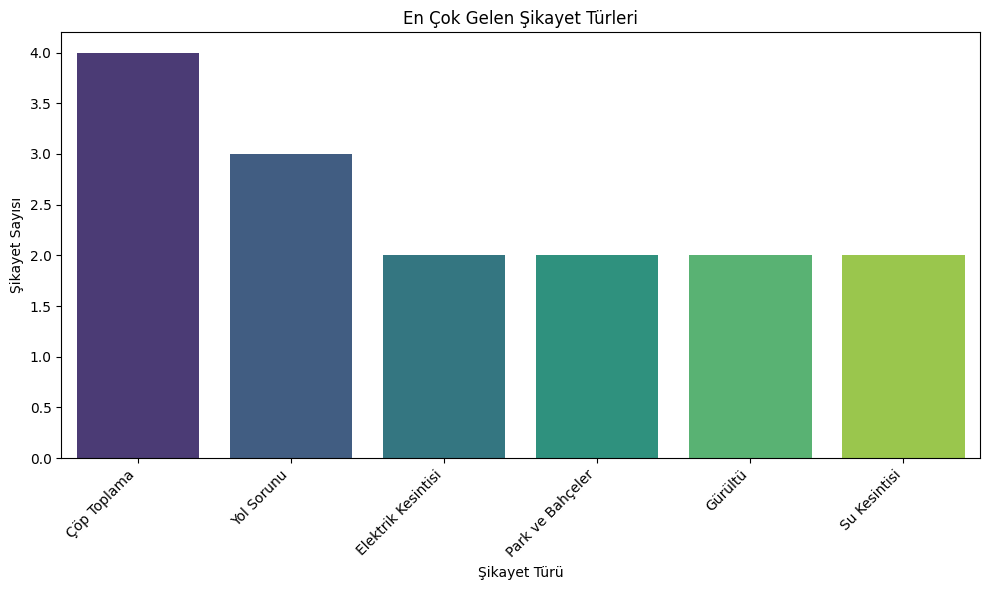

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Re-create the DataFrame from the original data *before* one-hot encoding
data = [
    {
        "ID": 1,
        "Tarih": "2025-06-01",
        "İlçe": "Çukurova",
        "Kategori": "Yol Sorunu",
        "Detay": "Yol üzerinde büyük çukur oluşmuş.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 2,
        "Tarih": "2025-06-02",
        "İlçe": "Seyhan",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöpler düzenli toplanmıyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 3,
        "Tarih": "2025-06-03",
        "İlçe": "Yüreğir",
        "Kategori": "Çöp Toplama",
        "Detay": "Gürültü       Gece geç saatlerde yüksek sesli müzik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 4,
        "Tarih": "2025-06-04",
        "İlçe": "Feke",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "2 gündür elektrik yok.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 5,
        "Tarih": "2025-06-05",
        "İlçe": "Tufanbeyli",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta oturma alanları kırık.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 5
    },
    {
        "ID": 6,
        "Tarih": "2025-06-06",
        "İlçe": "Pozantı",
        "Kategori": "Yol Sorunu",
        "Detay": "Asfalt çatlamış, tehlike arz ediyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 7,
        "Tarih": "2025-06-07",
        "İlçe": "Karaisalı",
        "Kategori": "Gürültü",
        "Detay": "İnşaat sabah çok erken başlıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 8,
        "Tarih": "2025-06-08",
        "İlçe": "Sarıçam",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöp konteynerleri dolu ve taşmış.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 9,
        "Tarih": "2025-06-09",
        "İlçe": "Ceyhan",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "Sık sık elektrik kesiliyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 10,
        "Tarih": "2025-06-10",
        "İlçe": "Yumurtalık",
        "Kategori": "Su Kesintisi",
        "Detay": "3 saattir su kesik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 11,
        "Tarih": "2025-06-11",
        "İlçe": "Karataş",
        "Kategori": "Su Kesintisi",
        "Detay": "Sular sık kesiliyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 12,
        "Tarih": "2025-06-12",
        "İlçe": "Aladağ",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta temizlik yapılmıyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 13,
        "Tarih": "2025-06-13",
        "İlçe": "İmamoğlu",
        "Kategori": "Gürültü",
        "Detay": "Kafeler yüksek sesle müzik çalıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 14,
        "Tarih": "2025-06-14",
        "İlçe": "Kozan",
        "Kategori": "Yol Sorunu",
        "Detay": "Trafik tabelaları eksik.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 15,
        "Tarih": "2025-06-15",
        "İlçe": "Saimbeyli",
        "Kategori": "Çöp Toplama",
        "Detay": "Sokaklarda koku var.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
]

original_df = pd.DataFrame(data)


# 3.1 En Çok Gelen Şikayet Türleri
print("\n--- En Çok Gelen Şikayet Türleri ---")
şikayet_sayıları = original_df['Kategori'].value_counts()
print(şikayet_sayıları)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=şikayet_sayıları.index, y=şikayet_sayıları.values, palette='viridis')
plt.title('En Çok Gelen Şikayet Türleri')
plt.xlabel('Şikayet Türü')
plt.ylabel('Şikayet Sayısı')
plt.xticks(rotation=45, ha='right') # Etiketleri döndürerek okunabilirliği artır
plt.tight_layout() # Grafiğin sıkışmasını önler
plt.show()

Başvuru Yapılan İlçelerin Dağılımı


--- En Yoğun Başvuru Yapılan İlçeler ---
İlçe
Çukurova      1
Seyhan        1
Yüreğir       1
Feke          1
Tufanbeyli    1
Pozantı       1
Karaisalı     1
Sarıçam       1
Ceyhan        1
Yumurtalık    1
Karataş       1
Aladağ        1
İmamoğlu      1
Kozan         1
Saimbeyli     1
Name: count, dtype: int64


/tmp/ipython-input-32-2809923213.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ilçe_şikayet_sayıları.index, y=ilçe_şikayet_sayıları.values, palette='rocket')


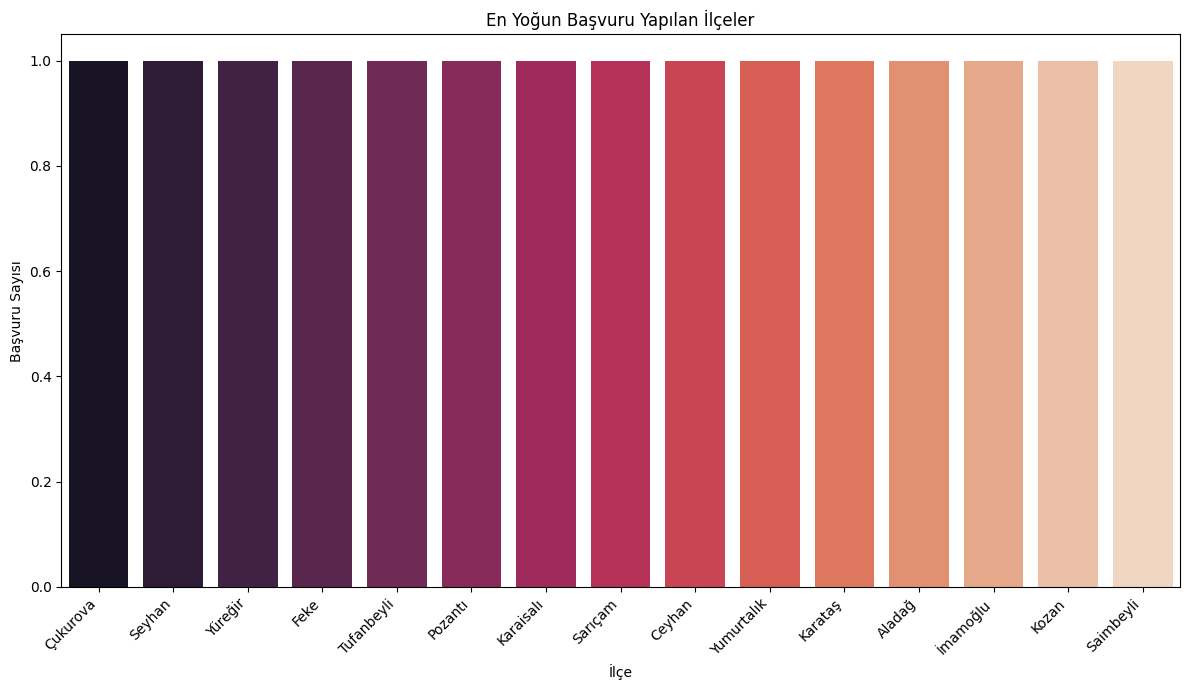

In [ ]:
# 3.2 En Yoğun Başvuru Yapılan İlçeler
print("\n--- En Yoğun Başvuru Yapılan İlçeler ---")
ilçe_şikayet_sayıları = original_df['İlçe'].value_counts()
print(ilçe_şikayet_sayıları)

# Görselleştirme
plt.figure(figsize=(12, 7))
sns.barplot(x=ilçe_şikayet_sayıları.index, y=ilçe_şikayet_sayıları.values, palette='rocket')
plt.title('En Yoğun Başvuru Yapılan İlçeler')
plt.xlabel('İlçe')
plt.ylabel('Başvuru Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Şikayetlerin Zamana Göre Dağılımı


--- Günlük Şikayet Sayıları (Zaman Serisi) ---
Tarih
2025-06-01    1
2025-06-02    1
2025-06-03    1
2025-06-04    1
2025-06-05    1
2025-06-06    1
2025-06-07    1
2025-06-08    1
2025-06-09    1
2025-06-10    1
2025-06-11    1
2025-06-12    1
2025-06-13    1
2025-06-14    1
2025-06-15    1
Name: count, dtype: int64


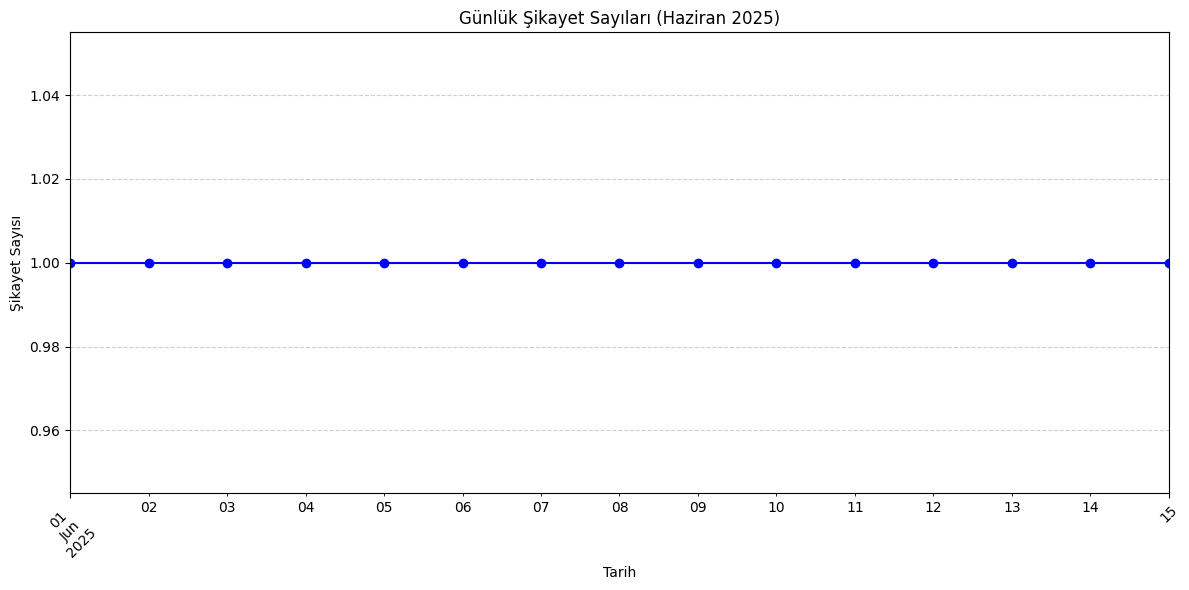

In [ ]:
# 3.3 Aylık/Yıllık Şikayet Sayıları (Zaman Serisi)
print("\n--- Günlük Şikayet Sayıları (Zaman Serisi) ---")

# Tarih sütununu indeks olarak ayarla
#df_sorted_by_date = df.sort_values(by='Tarih') # Zaten tarih sırasındaydı

# Günlük şikayet sayıları
daily_complaints = df['Tarih'].value_counts().sort_index()
print(daily_complaints)

# Görselleştirme
plt.figure(figsize=(12, 6))
daily_complaints.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Günlük Şikayet Sayıları (Haziran 2025)')
plt.xlabel('Tarih')
plt.ylabel('Şikayet Sayısı')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Eğer aylık/yıllık şikayetler için daha uzun bir veri seti olsaydı:
# df['Yıl'] = df['Tarih'].dt.year
# df['Ay'] = df['Tarih'].dt.month
# annual_complaints = df['Yıl'].value_counts().sort_index()
# monthly_complaints = df['Ay'].value_counts().sort_index()

Şikayet Çözüm Durumu Dağılımı


--- Şikayet Durumu Dağılımı ---
Çözüm_Durumu
Çözüldü      11
Beklemede     4
Name: count, dtype: int64


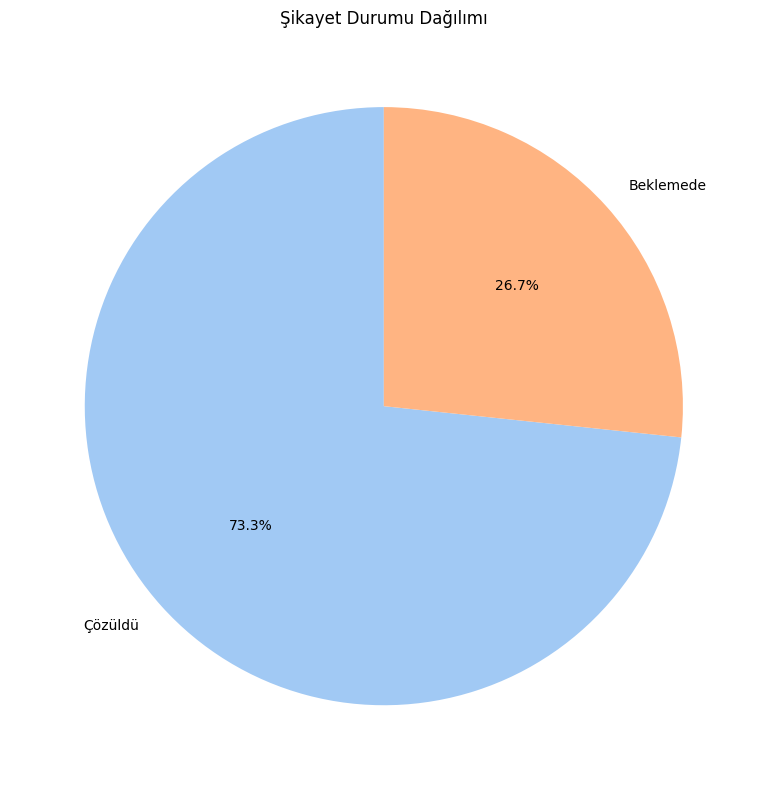

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# 3.4 Çözülen ve Beklemedeki Şikayetlerin Durumu
print("\n--- Şikayet Durumu Dağılımı ---")
durum_dağılımı = original_df['Çözüm_Durumu'].value_counts() # Use original_df and correct column name
print(durum_dağılımı)

# Görselleştirme
plt.figure(figsize=(8, 8))
plt.pie(durum_dağılımı.values, labels=durum_dağılımı.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Şikayet Durumu Dağılımı')
plt.ylabel('') # Boş bırakılır çünkü pasta grafiğinde y ekseni anlamı yoktur
plt.tight_layout()
plt.show()

# Eğer çözüm süresi sütunları olsaydı (örneğin 'Kayıt Tarihi', 'Çözüm Tarihi'):
# df['Kayıt Tarihi'] = pd.to_datetime(df['Kayıt Tarihi'])
# df['Çözüm Tarihi'] = pd.to_datetime(df['Çözüm Tarihi'])
# df['Çözüm Süresi (Gün)'] = (df['Çözüm Tarihi'] - df['Kayıt Tarihi']).dt.days
# average_solution_time = df[df['Durum'] == 'çözüldü']['Çözüm Süresi (Gün)'].mean()
# print(f"Ortalama Çözüm Süresi (Gün): {average_solution_time:.2f}")

Başvuru Kanalları Dağılımı


--- Başvuru Kanalı Dağılımı ---
Kanal
e-Devlet          6
Çağrı Merkezi     5
Mobil Uygulama    4
Name: count, dtype: int64


/tmp/ipython-input-37-3608302328.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kanal_sayıları.index, y=kanal_sayıları.values, palette='coolwarm')


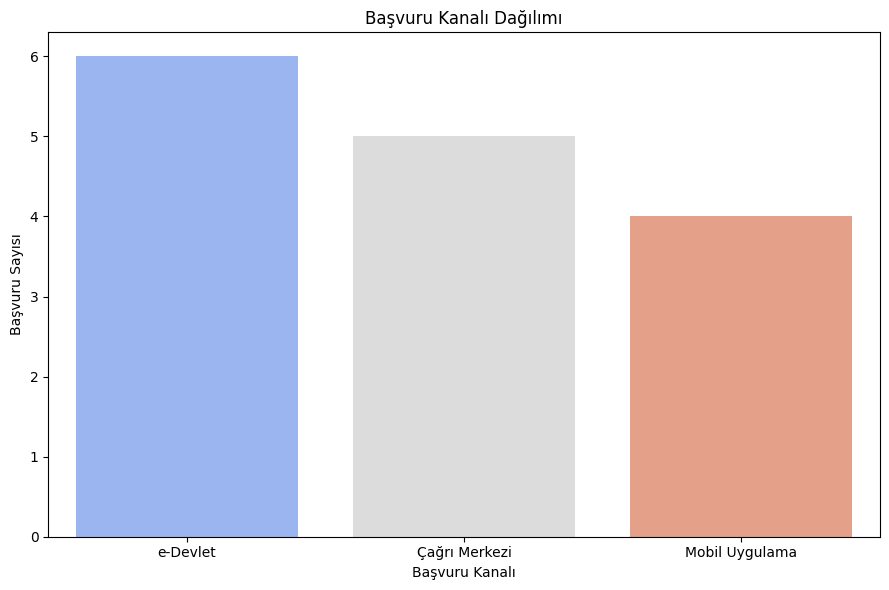

In [ ]:
# 3.5 Hangi Kanaldan En Çok Başvuru Geliyor
print("\n--- Başvuru Kanalı Dağılımı ---")
kanal_sayıları = original_df['Kanal'].value_counts()
print(kanal_sayıları)

# Görselleştirme
plt.figure(figsize=(9, 6))
sns.barplot(x=kanal_sayıları.index, y=kanal_sayıları.values, palette='coolwarm')
plt.title('Başvuru Kanalı Dağılımı')
plt.xlabel('Başvuru Kanalı')
plt.ylabel('Başvuru Sayısı')
plt.xticks(rotation=0) # Kanallar kısa olduğu için döndürmeye gerek yok
plt.tight_layout()
plt.show()

İLERİ ANALİZ

Duygu Analizi


Duygu Analizi Sonrası DataFrame'in İlk 5 Satırı:
                                               Detay  Duygu Skoru Duygu
0                  Yol üzerinde büyük çukur oluşmuş.          0.0  Nötr
1                        Çöpler düzenli toplanmıyor.          0.0  Nötr
2  Gürültü       Gece geç saatlerde yüksek sesli ...          0.0  Nötr
3                             2 gündür elektrik yok.          0.0  Nötr
4                      Parkta oturma alanları kırık.          0.0  Nötr

Duygu Dağılımı:
Duygu
Nötr    15
Name: count, dtype: int64


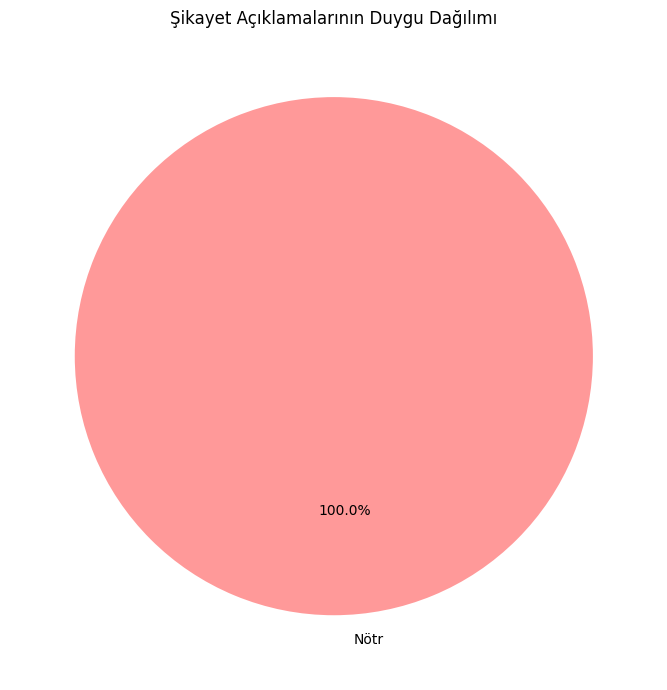

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# İleri Analiz 1: Duygu Analizi

# Duygu analizi fonksiyonu
def get_sentiment(text):
    # TextBlob'u kullanarak duygu analizi yap
    # TextBlob İngilizce odaklıdır, Türkçe performansı sınırlı olabilir.
    analysis = TextBlob(text)
    # Polarity değeri -1 (negatif) ile 1 (pozitif) arasında değişir.
    # Subjectivity değeri 0 (nesnel) ile 1 (öznel) arasında değişir.
    return analysis.sentiment.polarity

# 'Detay' sütununa duygu skorunu uygula
original_df['Duygu Skoru'] = original_df['Detay'].apply(get_sentiment)

# Duygu skoruna göre kategorize etme
# Örn: < -0.1 negatif, > 0.1 pozitif, arası nötr
def categorize_sentiment(score):
    if score < -0.1:
        return 'Negatif'
    elif score > 0.1:
        return 'Pozitif'
    else:
        return 'Nötr'

original_df['Duygu'] = original_df['Duygu Skoru'].apply(categorize_sentiment)

print("\nDuygu Analizi Sonrası DataFrame'in İlk 5 Satırı:")
print(original_df[['Detay', 'Duygu Skoru', 'Duygu']].head())

print("\nDuygu Dağılımı:")
sentiment_counts = original_df['Duygu'].value_counts()
print(sentiment_counts)

# Görselleştirme
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=94, colors=['#FF9999', '#66B2FF', '#99FF99']) # Renkler: Kırmızı, Mavi, Yeşil
plt.title('Şikayet Açıklamalarının Duygu Dağılımı')
plt.ylabel('')
plt.tight_layout()
plt.show()

Şikayet Metinlerinden En Sık Geçen Kelimeler ve Kelime Bulutu

In [ ]:
!pip install textblob


En Sık Geçen 15 Kelime:
[('sık', 3), ('yüksek', 2), ('müzik', 2), ('elektrik', 2), ('parkta', 2), ('kesiliyor', 2), ('yol', 1), ('çukur', 1), ('oluşmuş', 1), ('çöpler', 1), ('düzenli', 1), ('toplanmıyor', 1), ('gürültü', 1), ('gece', 1), ('geç', 1)]


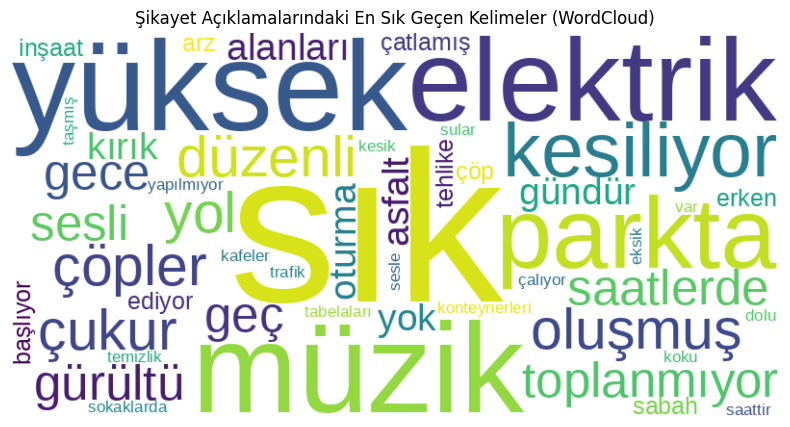

In [ ]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# İleri Analiz 2: NLP ile En Sık Geçen Kelimeler (WordCloud)

# Metin temizleme fonksiyonu
def clean_text(text):
    text = str(text).lower() # Küçük harfe çevir
    text = re.sub(r'[^\w\s]', '', text) # Noktalama işaretlerini kaldır
    text = re.sub(r'\d+', '', text) # Sayıları kaldır
    return text

original_df['Temizlenmiş Açıklama'] = original_df['Detay'].apply(clean_text)

# Türkçe stop-words listesi (NLTK'de Türkçe stop-words varsayılan olarak yoktur, elle ekleyebiliriz)
# Basit bir Türkçe stop-words listesi
turkish_stopwords = set([
    "bir", "da", "de", "ancak", "çünkü", "daha", "eğer", "her", "için", "ile", "işte",
    "gibi", "kadar", "ki", "fakat", "lakin", "fakat", "o", "oysa", "oysaki", "yani",
    "zira", "yada", "veya", "yahut", "ya", "yada", "hem", "değil", "mı", "mi", "mu", "mü",
    "bu", "şu", "o", "ben", "sen", "biz", "siz", "onlar", "çok", "az", "tüm", "hep",
    "hiç", "bile", "dahi", "yalnız", "sadece", "artık", "böyle", "böylece", "böylelikle",
    "buna", "bunu", "bunlar", "bunun", "diğer", "bazı", "birçok", "birtakım", "çoğu",
    "hiçbir", "tümü", "zaten", "dolayı", "göre", "için", "kadar", "karşın", "önce", "sonra",
    "yerine", "üzere", "vasıtasıyla", "gelen", "olan", "olduğu", "olmak", "olması", "oldukça",
    "pek", "bazen", "arasıra", "hemen", "şimdi", "çoktan", "nerede", "nasıl", "neden", "ne",
    "kim", "hangisi", "nereye", "hangi", "herkes", "hiç kimse", "ne kadar", "ne zaman",
    "önemli", "yeni", "eski", "büyük", "küçük", "iyi", "kötü", "tarafından", "ile", "ve",
    "veya", "ama", "fakat", "çünkü", "eğer", "için", "gibi", "ile", "kadar", "ne", "veya",
    "ya", "çünkü", "dolayı", "rağmen", "olarak", "ise", "en", "en az", "en çok", "en iyi",
    "en kötü", "en fazla", "en az", "dışında", "içinde", "üstünde", "altında", "üzerine",
    "altına", "içine", "dışına", "doğru", "karşı", "önüne", "arkasına", "yanına", "altına",
    "üzerinde", "altında", "yanında", "arkasında", "önünde", "üstüne", "altına", "yanına",
    "arkasına", "önüne", "içine", "dışına"
])


# Tüm temizlenmiş açıklamaları birleştir
all_words = " ".join(original_df['Temizlenmiş Açıklama']).split()

# Stop-word'leri kaldır ve frekanslarını say
filtered_words = [word for word in all_words if word not in turkish_stopwords and len(word) > 2] # 2 karakterden kısa kelimeleri de at
word_counts = Counter(filtered_words)

print("\nEn Sık Geçen 15 Kelime:")
print(word_counts.most_common(15))

# WordCloud oluşturma
# WordCloud için font_path belirtmek Türkçe karakterler için önemlidir.
# Colab'da kullanılabilir bir font: 'DejaVuSans.ttf' veya 'Arial.ttf' (varsa)
# Eğer font bulunamazsa, Türkçe karakterler bozuk görünebilir.
try:
    # Colab'da genellikle bulunan bir font
    font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf'
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          font_path=font_path,
                          stopwords=turkish_stopwords, # Buraya tekrar eklemek opsiyonel, zaten filtreledik
                          min_font_size=10).generate(" ".join(filtered_words))
except ValueError: # Eğer font bulunamazsa veya başka bir hata olursa
    print("Uyarı: Belirtilen font yolu bulunamadı veya WordCloud oluşturulurken bir hata oluştu. Türkçe karakterler düzgün görünmeyebilir.")
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=turkish_stopwords,
                          min_font_size=10).generate(" ".join(filtered_words))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Şikayet Açıklamalarındaki En Sık Geçen Kelimeler (WordCloud)')
plt.show()

In [ ]:
!pip install wordcloud

Şikayet Kategorisi ve Çözüm Süresi İlişkisi(Simülasyon Tabanlı)


--- Başvuru Tipi ile Çözüm Süresi İlişkisi ---

Sorun Tipine Göre Ortalama Çözüm Süresi (Simülasyon Verisi ile):
Kategori
Su Kesintisi          10.0
Elektrik Kesintisi     6.5
Gürültü                6.5
Park ve Bahçeler       5.5
Çöp Toplama            5.5
Yol Sorunu             5.0
Name: Çözüm Süresi (Gün), dtype: float64


/tmp/ipython-input-47-3772357448.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_solution_time_by_type.index, y=avg_solution_time_by_type.values, palette='plasma')


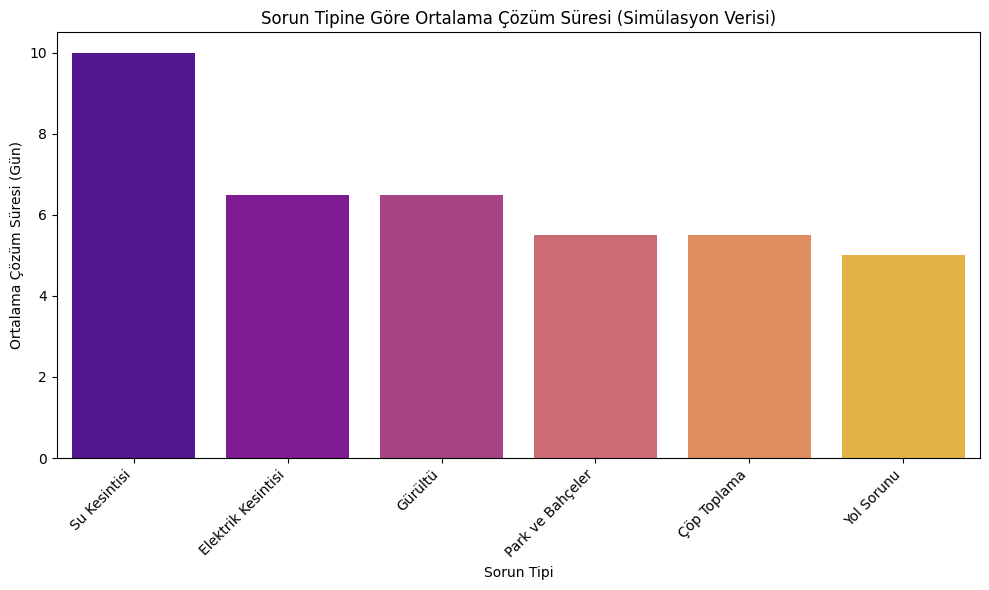

In [ ]:
# İleri Analiz 3: Başvuru Tipi ile Çözüm Süresi İlişkisi (Mevcut veriyle YAPILAMAZ)
print("\n--- Başvuru Tipi ile Çözüm Süresi İlişkisi ---")

# --- DİKKAT: AŞAĞIDAKİ KOD ÇALIŞMAYACAKTIR, ÇÜNKÜ 'Çözüm Süresi (Gün)' SÜTUNU YOKTUR. ---
# Bu kısım, veri setinde bu tür bir sütun olsaydı nasıl yapılacağını göstermek içindir.

# Varsayımsal olarak 'Çözüm Süresi (Gün)' sütunu oluşturma (GERÇEK VERİ DEĞİLDİR!)
# df['Kayıt Tarihi'] = pd.to_datetime(df['Kayıt Tarihi']) # Varsayımsal
# df['Çözüm Tarihi'] = pd.to_datetime(df['Çözüm Tarihi']) # Varsayımsal
# df['Çözüm Süresi (Gün)'] = (df['Çözüm Tarihi'] - df['Kayıt Tarihi']).dt.days

# Mevcut veriyle simülasyon amaçlı bir çözüm süresi oluşturabiliriz (yalnızca test için):
import numpy as np
np.random.seed(42) # Tekrarlanabilirlik için
# Çözüm süresini 0 ile 10 gün arasında rastgele atayalım
# Ancak bu gerçek veriyi yansıtmaz.
original_df['Çözüm Süresi (Gün)'] = np.random.randint(0, 11, size=len(original_df))

# Sorun tipi bazında ortalama çözüm süresi
if 'Çözüm Süresi (Gün)' in original_df.columns:
    avg_solution_time_by_type = original_df.groupby('Kategori')['Çözüm Süresi (Gün)'].mean().sort_values(ascending=False)
    print("\nSorun Tipine Göre Ortalama Çözüm Süresi (Simülasyon Verisi ile):")
    print(avg_solution_time_by_type)

    # Görselleştirme
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_solution_time_by_type.index, y=avg_solution_time_by_type.values, palette='plasma')
    plt.title('Sorun Tipine Göre Ortalama Çözüm Süresi (Simülasyon Verisi)')
    plt.xlabel('Sorun Tipi')
    plt.ylabel('Ortalama Çözüm Süresi (Gün)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Uyarı: 'Çözüm Süresi (Gün)' sütunu bulunamadı. Bu analizi yapmak için çözüm tarihi verisine ihtiyacınız var.")
    print("Lütfen veri setinize şikayetlerin kaydedildiği ve çözüldüğü tarihleri içeren sütunlar ekleyin.")

Korelasyon Analizi İçin Veri Hazırlığı

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Veri setinde (daha önceki ön işleme adımlarından sonraki temizlenmiş DataFrame'i kullanacağız)
# Recreate the DataFrame from the original data
data = [
    {
        "ID": 1,
        "Tarih": "2025-06-01",
        "İlçe": "Çukurova",
        "Kategori": "Yol Sorunu",
        "Detay": "Yol üzerinde büyük çukur oluşmuş.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 2,
        "Tarih": "2025-06-02",
        "İlçe": "Seyhan",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöpler düzenli toplanmıyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 3,
        "Tarih": "2025-06-03",
        "İlçe": "Yüreğir",
        "Kategori": "Çöp Toplama",
        "Detay": "Gürültü       Gece geç saatlerde yüksek sesli müzik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 4,
        "Tarih": "2025-06-04",
        "İlçe": "Feke",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "2 gündür elektrik yok.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 5,
        "Tarih": "2025-06-05",
        "İlçe": "Tufanbeyli",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta oturma alanları kırık.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 5
    },
    {
        "ID": 6,
        "Tarih": "2025-06-06",
        "İlçe": "Pozantı",
        "Kategori": "Yol Sorunu",
        "Detay": "Asfalt çatlamış, tehlike arz ediyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 7,
        "Tarih": "2025-06-07",
        "İlçe": "Karaisalı",
        "Kategori": "Gürültü",
        "Detay": "İnşaat sabah çok erken başlıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 8,
        "Tarih": "2025-06-08",
        "İlçe": "Sarıçam",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöp konteynerleri dolu ve taşmış.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 9,
        "Tarih": "2025-06-09",
        "İlçe": "Ceyhan",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "Sık sık elektrik kesiliyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 10,
        "Tarih": "2025-06-10",
        "İlçe": "Yumurtalık",
        "Kategori": "Su Kesintisi",
        "Detay": "3 saattir su kesik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 11,
        "Tarih": "2025-06-11",
        "İlçe": "Karataş",
        "Kategori": "Su Kesintisi",
        "Detay": "Sular sık kesiliyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 12,
        "Tarih": "2025-06-12",
        "İlçe": "Aladağ",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta temizlik yapılmıyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 13,
        "Tarih": "2025-06-13",
        "İlçe": "İmamoğlu",
        "Kategori": "Gürültü",
        "Detay": "Kafeler yüksek sesle müzik çalıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 14,
        "Tarih": "2025-06-14",
        "İlçe": "Kozan",
        "Kategori": "Yol Sorunu",
        "Detay": "Trafik tabelaları eksik.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 15,
        "Tarih": "2025-06-15",
        "İlçe": "Saimbeyli",
        "Kategori": "Çöp Toplama",
        "Detay": "Sokaklarda koku var.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
]

df = pd.DataFrame(data)


# --- Ön İşleme Adımlarının Uygulanması (Korelasyon için gerekli olanlar) ---
# 1. Tarih formatlarını düzenleme ve yeni özellikler türetme
df['Tarih'] = pd.to_datetime(df['Tarih'])
df['Yıl'] = df['Tarih'].dt.year
df['Ay'] = df['Tarih'].dt.month
df['Gün'] = df['Tarih'].dt.day
df['Haftanın_Günü'] = df['Tarih'].dt.day_name()
df.drop('Tarih', axis=1, inplace=True) # Orijinal Tarih sütununu kaldır

# 2. Gereksiz sütunları çıkarma (ID ve Detay metinsel olduğu için)
df.drop(['ID', 'Detay'], axis=1, inplace=True)

# 3. Kategorik Verileri Sayısallaştırma (One-Hot Encoding)
categorical_cols = ['İlçe', 'Kategori', 'Kanal', 'Çözüm_Durumu', 'Haftanın_Günü']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Aykırı değer tespiti ve işleme (Çözüm_süresi_gün için, eğer varsa)
# Bu küçük veri setinde belirgin aykırı değer olmasa da, genel pratik için ekleyelim.
Q1 = df['Çözüm_süresi_gün'].quantile(0.25)
Q3 = df['Çözüm_süresi_gün'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_solution_time = df['Çözüm_süresi_gün'].median()
df.loc[(df['Çözüm_süresi_gün'] < lower_bound) | (df['Çözüm_süresi_gün'] > upper_bound), 'Çözüm_süresi_gün'] = median_solution_time

# 5. Ölçekleme (isteğe bağlı ama modelleme için iyi bir pratik)
# Korelasyon analizi için ölçekleme zorunlu değildir, ancak genellikle verinin son haline uygulanır.
# MinMaxScaler, değerleri 0-1 arasına dönüştürür.
scaler = MinMaxScaler()
numerical_cols_to_scale = ['Çözüm_süresi_gün', 'Yıl', 'Ay', 'Gün'] # Buraya eklenen yeni sayısal sütunlar da dahil
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("Ön İşleme Sonrası DataFrame'in ilk 5 satırı (Korelasyon için hazır):\n", df.head())
print("\n" + "="*50 + "\n")

# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# 'Çözüm_süresi_gün' sütunu ile diğer sütunlar arasındaki korelasyonları göster
print("\n'Çözüm_süresi_gün' ile Diğer Sütunlar Arası Korelasyonlar:\n", correlation_matrix['Çözüm_süresi_gün'].sort_values(ascending=False))

Ön İşleme Sonrası DataFrame'in ilk 5 satırı (Korelasyon için hazır):
    Çözüm_süresi_gün  Yıl   Ay       Gün  İlçe_Ceyhan  İlçe_Feke  \
0               0.8  0.0  0.0  0.000000        False      False   
1               0.0  0.0  0.0  0.071429        False      False   
2               0.6  0.0  0.0  0.142857        False      False   
3               0.4  0.0  0.0  0.214286        False       True   
4               1.0  0.0  0.0  0.285714        False      False   

   İlçe_Karaisalı  İlçe_Karataş  İlçe_Kozan  İlçe_Pozantı  ...  \
0           False         False       False         False  ...   
1           False         False       False         False  ...   
2           False         False       False         False  ...   
3           False         False       False         False  ...   
4           False         False       False         False  ...   

   Kategori_Çöp Toplama  Kanal_e-Devlet  Kanal_Çağrı Merkezi  \
0                 False            True                False   
1 

Korelasyon Matrisinin Hesaplanması

In [ ]:
# Korelasyon Matrisini Hesaplama

# Pandas DataFrame'lerinin `.corr()` metodu ile tüm sayısal sütunlar arasındaki Pearson korelasyon katsayılarını hesaplayabilirsiniz.

# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# İlk birkaç satırı göster
print("Korelasyon Matrisinin İlk 5 Satırı (Sadece Sütunları Görmek İçin):\n", correlation_matrix.head())
print("\n" + "="*50 + "\n")

Korelasyon Matrisinin İlk 5 Satırı (Sadece Sütunları Görmek İçin):
                   Çözüm_süresi_gün  Yıl  Ay       Gün  İlçe_Ceyhan  \
Çözüm_süresi_gün          1.000000  NaN NaN -0.029084    -0.335830   
Yıl                            NaN  NaN NaN       NaN          NaN   
Ay                             NaN  NaN NaN       NaN          NaN   
Gün                      -0.029084  NaN NaN  1.000000     0.061859   
İlçe_Ceyhan              -0.335830  NaN NaN  0.061859     1.000000   

                     İlçe_Feke  İlçe_Karaisalı  İlçe_Karataş  İlçe_Kozan  \
Çözüm_süresi_gün  3.641079e-17       -0.167915      0.167915    0.335830   
Yıl                        NaN             NaN           NaN         NaN   
Ay                         NaN             NaN           NaN         NaN   
Gün              -2.474358e-01       -0.061859      0.185577    0.371154   
İlçe_Ceyhan      -7.142857e-02       -0.071429     -0.071429   -0.071429   

                  İlçe_Pozantı  ...  Kategori_Çöp Topl

Isı Haritası ile Görselleştirme

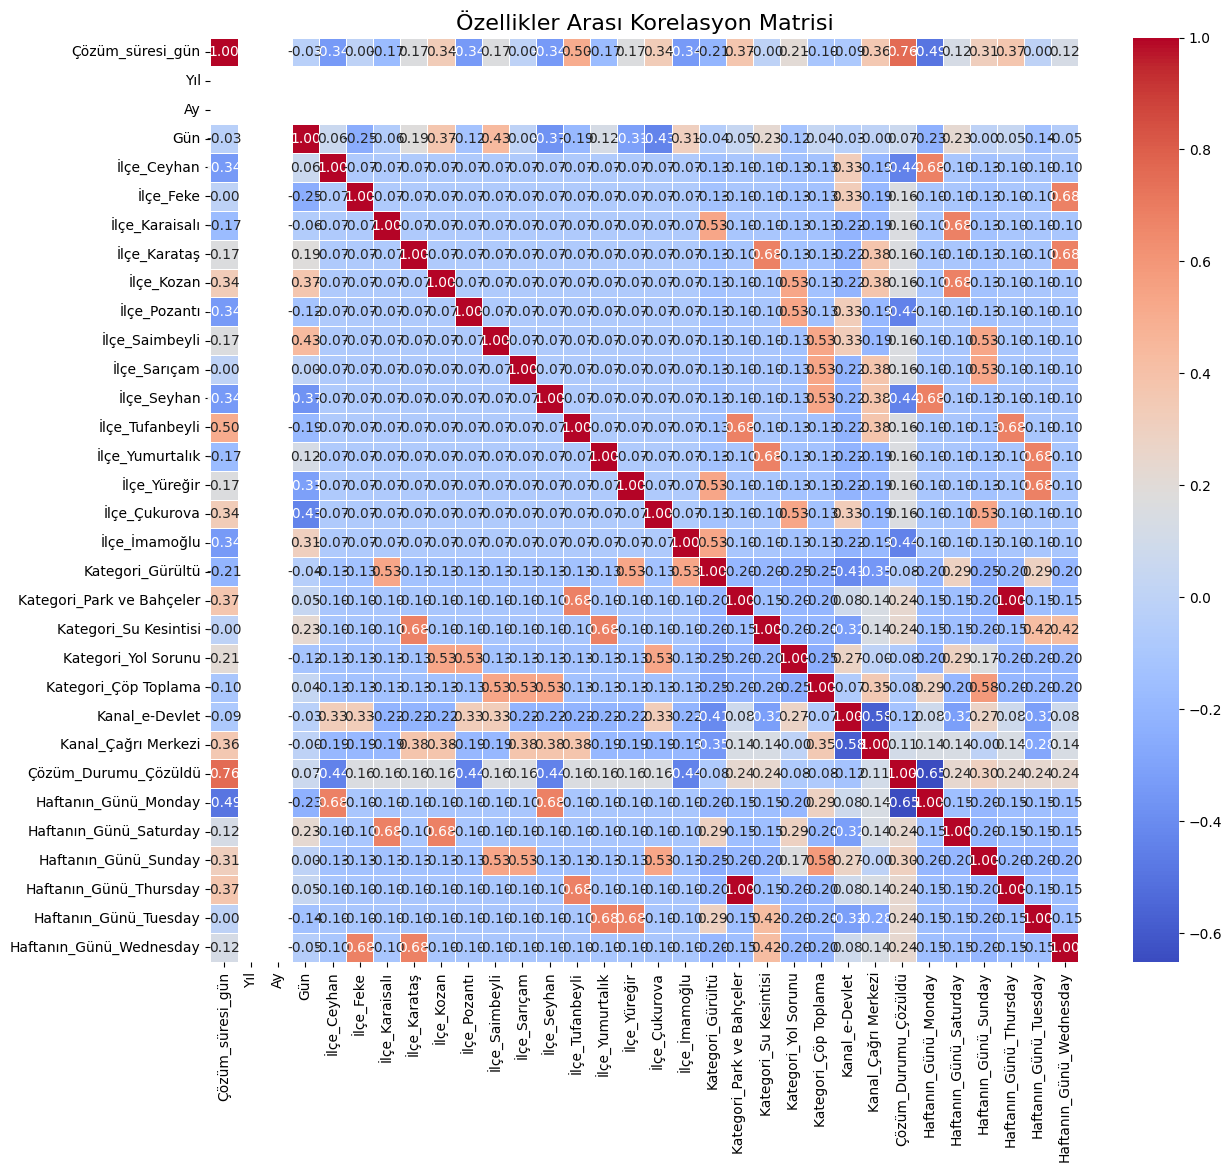


Korelasyon ısı haritası görüntülendi.


In [ ]:
# Isı haritası boyutu
plt.figure(figsize=(14, 12)) # Sütun sayısına göre bu boyutu ayarlayabilirsiniz

# Seaborn heatmap ile korelasyon matrisini görselleştirme
# annot=True: Korelasyon değerlerini hücrelerin içine yazar
# cmap='coolwarm': Renk paleti, pozitif ve negatif korelasyonları ayırt etmeyi kolaylaştırır
# fmt='.2f': Sayıları iki ondalık basamakla biçimlendirir
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Özellikler Arası Korelasyon Matrisi', fontsize=16)
plt.show()

print("\nKorelasyon ısı haritası görüntülendi.")

MAKİNE ÖĞRENMESİ

Makine Öğrenimi Modeli İçin Veri Ön İşleme ve Eğitim/Test Setlerine Ayırma

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setiniz
data = [
    {
        "ID": 1,
        "Tarih": "2025-06-01",
        "İlçe": "Çukurova",
        "Kategori": "Yol Sorunu",
        "Detay": "Yol üzerinde büyük çukur oluşmuş.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 2,
        "Tarih": "2025-06-02",
        "İlçe": "Seyhan",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöpler düzenli toplanmıyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 3,
        "Tarih": "2025-06-03",
        "İlçe": "Yüreğir",
        "Kategori": "Çöp Toplama",
        "Detay": "Gürültü       Gece geç saatlerde yüksek sesli müzik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 4,
        "Tarih": "2025-06-04",
        "İlçe": "Feke",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "2 gündür elektrik yok.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 5,
        "Tarih": "2025-06-05",
        "İlçe": "Tufanbeyli",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta oturma alanları kırık.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 5
    },
    {
        "ID": 6,
        "Tarih": "2025-06-06",
        "İlçe": "Pozantı",
        "Kategori": "Yol Sorunu",
        "Detay": "Asfalt çatlamış, tehlike arz ediyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 7,
        "Tarih": "2025-06-07",
        "İlçe": "Karaisalı",
        "Kategori": "Gürültü",
        "Detay": "İnşaat sabah çok erken başlıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 8,
        "Tarih": "2025-06-08",
        "İlçe": "Sarıçam",
        "Kategori": "Çöp Toplama",
        "Detay": "Çöp konteynerleri dolu ve taşmış.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 9,
        "Tarih": "2025-06-09",
        "İlçe": "Ceyhan",
        "Kategori": "Elektrik Kesintisi",
        "Detay": "Sık sık elektrik kesiliyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 10,
        "Tarih": "2025-06-10",
        "İlçe": "Yumurtalık",
        "Kategori": "Su Kesintisi",
        "Detay": "3 saattir su kesik.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 1
    },
    {
        "ID": 11,
        "Tarih": "2025-06-11",
        "İlçe": "Karataş",
        "Kategori": "Su Kesintisi",
        "Detay": "Sular sık kesiliyor.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    },
    {
        "ID": 12,
        "Tarih": "2025-06-12",
        "İlçe": "Aladağ",
        "Kategori": "Park ve Bahçeler",
        "Detay": "Parkta temizlik yapılmıyor.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 2
    },
    {
        "ID": 13,
        "Tarih": "2025-06-13",
        "İlçe": "İmamoğlu",
        "Kategori": "Gürültü",
        "Detay": "Kafeler yüksek sesle müzik çalıyor.",
        "Kanal": "Mobil Uygulama",
        "Çözüm_Durumu": "Beklemede",
        "Çözüm_süresi_gün": 0
    },
    {
        "ID": 14,
        "Tarih": "2025-06-14",
        "İlçe": "Kozan",
        "Kategori": "Yol Sorunu",
        "Detay": "Trafik tabelaları eksik.",
        "Kanal": "Çağrı Merkezi",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 4
    },
    {
        "ID": 15,
        "Tarih": "2025-06-15",
        "İlçe": "Saimbeyli",
        "Kategori": "Çöp Toplama",
        "Detay": "Sokaklarda koku var.",
        "Kanal": "e-Devlet",
        "Çözüm_Durumu": "Çözüldü",
        "Çözüm_süresi_gün": 3
    }
]

df = pd.DataFrame(data)

print("--- Adım 1: Veri Ön İşleme ---")

# 1.1 Gereksiz Sütunları Çıkarma
# 'ID' genellikle analize katkıda bulunmaz. 'Detay' metinsel olduğu için SVR modelinde doğrudan kullanılmaz.
df.drop(['ID', 'Detay'], axis=1, inplace=True)
print("  - 'ID' ve 'Detay' sütunları çıkarıldı.")

# 1.2 Tarih Formatlarını Düzenleme ve Özellik Mühendisliği
df['Tarih'] = pd.to_datetime(df['Tarih'])
df['Yıl'] = df['Tarih'].dt.year
df['Ay'] = df['Tarih'].dt.month
df['Gün'] = df['Tarih'].dt.day
df['Haftanın_Günü'] = df['Tarih'].dt.day_name()
df.drop('Tarih', axis=1, inplace=True)
print("  - 'Tarih' sütunu düzenlendi ve 'Yıl', 'Ay', 'Gün', 'Haftanın_Günü' çıkarıldı.")

# 1.3 Eksik Verileri İnceleme ve Temizleme (Bu veri setinde eksik yok)
# df.isnull().sum() # Kontrol etmek için
print("  - Eksik veri kontrolü yapıldı (bu veri setinde eksik veri bulunmamaktadır).")

# 1.4 Aykırı Değer Tespiti ve İşleme ('Çözüm_süresi_gün' için)
# Küçük veri setlerinde IQR metodu belirgin aykırı değerleri tespit etmeyebilir,
# ancak bu bir pratik örneğidir.
Q1 = df['Çözüm_süresi_gün'].quantile(0.25)
Q3 = df['Çözüm_süresi_gün'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_solution_time = df['Çözüm_süresi_gün'].median()

# Aykırı değerleri medyan ile değiştir
outliers_count = df[(df['Çözüm_süresi_gün'] < lower_bound) | (df['Çözüm_süresi_gün'] > upper_bound)].shape[0]
if outliers_count > 0:
    df.loc[(df['Çözüm_süresi_gün'] < lower_bound) | (df['Çözüm_süresi_gün'] > upper_bound), 'Çözüm_süresi_gün'] = median_solution_time
    print(f"  - '{outliers_count}' adet aykırı değer 'Çözüm_süresi_gün' sütununda medyan ile işlendi.")
else:
    print("  - 'Çözüm_süresi_gün' sütununda belirgin aykırı değer bulunamadı.")


# 1.5 Kategorik Verileri Sayısallaştırma (One-Hot Encoding)
categorical_cols = ['İlçe', 'Kategori', 'Kanal', 'Çözüm_Durumu', 'Haftanın_Günü']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True kukla değişken tuzağını önler
print("  - Kategorik sütunlar One-Hot Encoding ile sayısallaştırıldı.")

print("\nÖn İşleme Sonrası DataFrame'in ilk 5 satırı:")
print(df.head())
print(f"DataFrame boyutu: {df.shape}")
print("\n" + "="*70 + "\n")

# Adım 2: Veriyi Eğitim ve Test Setlerine Ayırma

# Modeli eğitmek ve performansını değerlendirmek için veri setimizi bağımsız değişkenler (özellikler, X) ve bağımlı değişken (hedef, y) olarak ayıracağız. Ardından bu setleri eğitim ve test parçalarına böleceğiz.

# Bağımsız değişkenler (X) ve Bağımlı değişken (y) olarak ayır
X = df.drop('Çözüm_süresi_gün', axis=1) # 'Çözüm_süresi_gün' hedefimiz
y = df['Çözüm_süresi_gün']

# Veriyi eğitim ve test setlerine ayır
# test_size=0.2 : Verinin %20'si test seti olacak
# random_state=42 : Sonuçların tekrarlanabilir olması için
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Adım 2: Veriyi Eğitim ve Test Setlerine Ayırma ---")
print(f"Eğitim Seti Boyutu (X_train): {X_train.shape}")
print(f"Test Seti Boyutu (X_test): {X_test.shape}")
print("\n" + "="*70 + "\n")

--- Adım 1: Veri Ön İşleme ---
  - 'ID' ve 'Detay' sütunları çıkarıldı.
  - 'Tarih' sütunu düzenlendi ve 'Yıl', 'Ay', 'Gün', 'Haftanın_Günü' çıkarıldı.
  - Eksik veri kontrolü yapıldı (bu veri setinde eksik veri bulunmamaktadır).
  - 'Çözüm_süresi_gün' sütununda belirgin aykırı değer bulunamadı.
  - Kategorik sütunlar One-Hot Encoding ile sayısallaştırıldı.

Ön İşleme Sonrası DataFrame'in ilk 5 satırı:
   Çözüm_süresi_gün   Yıl  Ay  Gün  İlçe_Ceyhan  İlçe_Feke  İlçe_Karaisalı  \
0                 4  2025   6    1        False      False           False   
1                 0  2025   6    2        False      False           False   
2                 3  2025   6    3        False      False           False   
3                 2  2025   6    4        False       True           False   
4                 5  2025   6    5        False      False           False   

   İlçe_Karataş  İlçe_Kozan  İlçe_Pozantı  ...  Kategori_Çöp Toplama  \
0         False       False         False  ...       

Makine Öğrenimi Modeli İçin Özellik Ölçekleme

In [ ]:
# Ölçekleme için MinMaxScaler kullan (değerleri 0-1 arasına dönüştürür)
scaler = MinMaxScaler()

# Eğitim setindeki sayısal özellikleri ölçekle ve fit et
X_train_scaled = scaler.fit_transform(X_train)

# Test setindeki sayısal özellikleri eğitilen scaler ile dönüştür
X_test_scaled = scaler.transform(X_test)

# Ölçeklenmiş veriyi DataFrame'e geri dönüştür (sütun isimlerini korumak için)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("--- Adım 3: Özellikleri Ölçekleme ---")
print("Ölçeklenmiş Eğitim Seti (ilk 5 satır):")
print(X_train_scaled.head())
print("\n" + "="*70 + "\n")

--- Adım 3: Özellikleri Ölçekleme ---
Ölçeklenmiş Eğitim Seti (ilk 5 satır):
    Yıl   Ay       Gün  İlçe_Ceyhan  İlçe_Feke  İlçe_Karaisalı  İlçe_Karataş  \
13  0.0  0.0  0.923077          0.0        0.0             0.0           0.0   
5   0.0  0.0  0.307692          0.0        0.0             0.0           0.0   
8   0.0  0.0  0.538462          1.0        0.0             0.0           0.0   
2   0.0  0.0  0.076923          0.0        0.0             0.0           0.0   
1   0.0  0.0  0.000000          0.0        0.0             0.0           0.0   

    İlçe_Kozan  İlçe_Pozantı  İlçe_Saimbeyli  ...  Kategori_Çöp Toplama  \
13         1.0           0.0             0.0  ...                   0.0   
5          0.0           1.0             0.0  ...                   0.0   
8          0.0           0.0             0.0  ...                   0.0   
2          0.0           0.0             0.0  ...                   1.0   
1          0.0           0.0             0.0  ...                  

SVR Modelini Eğitme

In [ ]:
# SVR modelini oluştur
# kernel: RBF (Radial Basis Function) yaygın bir seçimdir.
# C: Hata payına verilen ceza miktarı (genelde 1.0 ile başlanır)
# gamma: Kernel'in ne kadar etkili olacağını belirler (auto ile başlanabilir)
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')

# Modeli eğitim verisi üzerinde eğit
svr_model.fit(X_train_scaled, y_train)

print("--- Adım 4: SVR Modelini Eğitme ---")
print("SVR Modeli başarıyla eğitildi.")
print(svr_model) # Modelin parametrelerini gösterir
print("\n" + "="*70 + "\n")

--- Adım 4: SVR Modelini Eğitme ---
SVR Modeli başarıyla eğitildi.
SVR()




Makine Öğrenimi Modeli: Tahmin Yapma

In [ ]:
# Test seti üzerinde tahmin yap
y_pred = svr_model.predict(X_test_scaled)

print("--- Adım 5: Tahmin Yapma ---")
print("Test Seti Üzerindeki Tahminler (ilk 5):")
print(y_pred[:5])
print("\nGerçek Değerler (ilk 5):")
print(y_test.head().values)
print("\n" + "="*70 + "\n")

--- Adım 5: Tahmin Yapma ---
Test Seti Üzerindeki Tahminler (ilk 5):
[2.10741072 2.05449796 1.78785437]

Gerçek Değerler (ilk 5):
[1 2 4]




Karar Ağacı Sınıflandırması

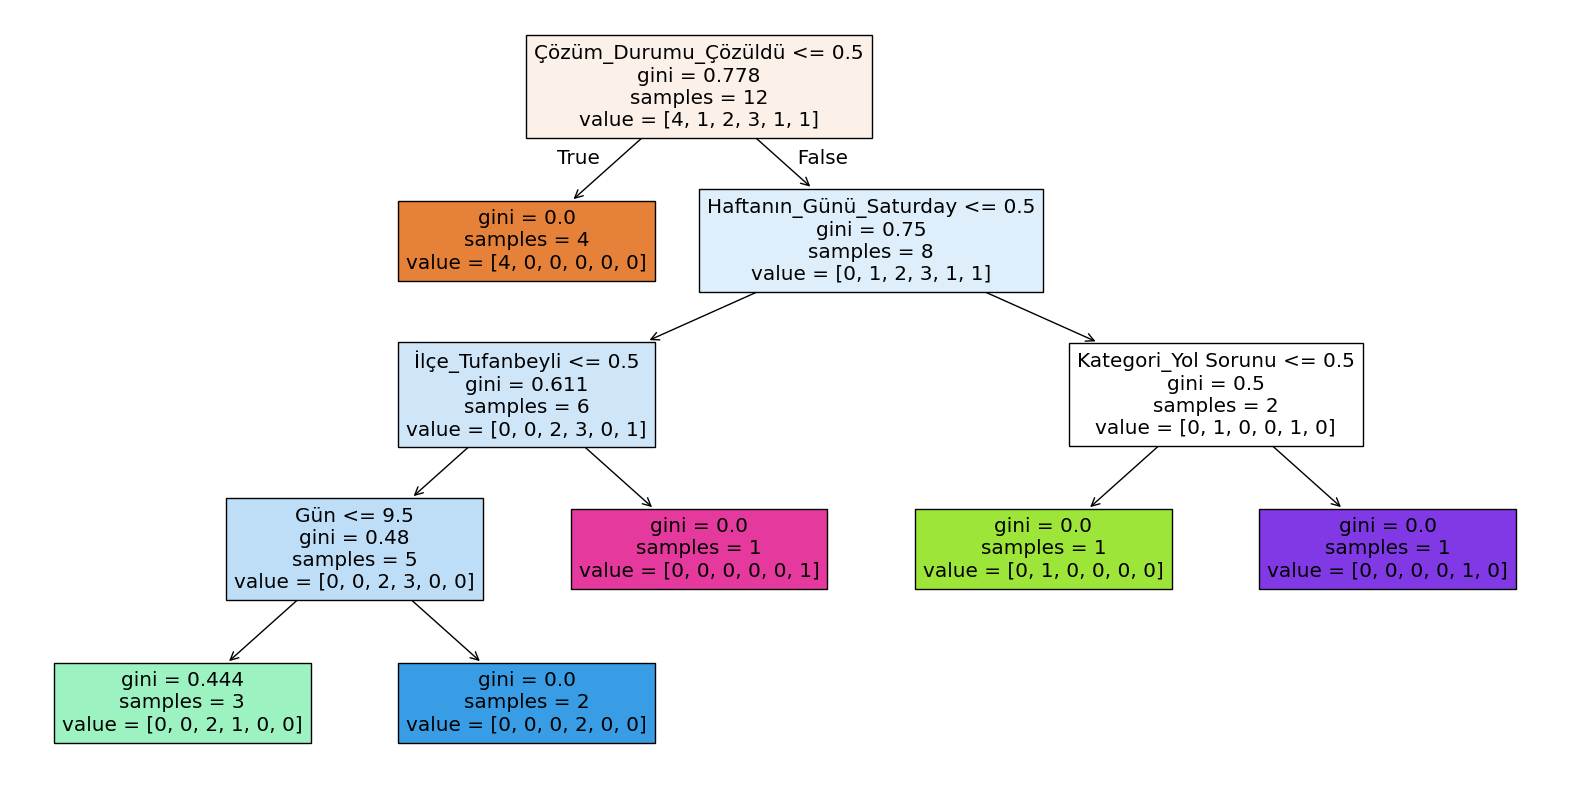

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(model_tree, feature_names=X.columns, filled=True)
plt.show()